In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from src.model import UNet
from src.dataset import get_load_data
from torch.utils.data import DataLoader
from src.predict import predict
import torch
import numpy as np
from src.dataloader import BasicDataset
import matplotlib.pyplot as plt

In [7]:
unet_model = UNet(num_classes=1)
train = BasicDataset(images_dir = "../../data/carvana/train", mask_dir = "../../data/carvana/train_masks")
test = BasicDataset(images_dir = "../../data/carvana/val", mask_dir = "../../data/carvana/val_masks")
test_set = DataLoader(test, batch_size=1)

trained_model_path = "../model_weights/carvana_epochs_10.pt"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(trained_model_path, map_location=torch.device(device))
imgs, smnts = next(iter(test_set))
model.eval()
model.to(device)
sigmoid = torch.nn.Sigmoid()
output_probs = sigmoid(model(imgs.to(device)))
output_probs = torch.where(output_probs > 0.5, 1, 0)

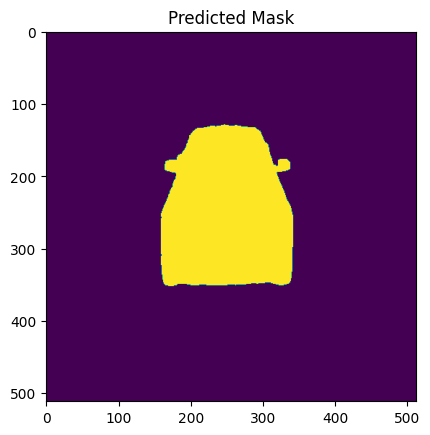

In [8]:
plt.imshow(output_probs.squeeze(0).permute((1,2,0)).cpu())
plt.title("Predicted Mask")
plt.show()

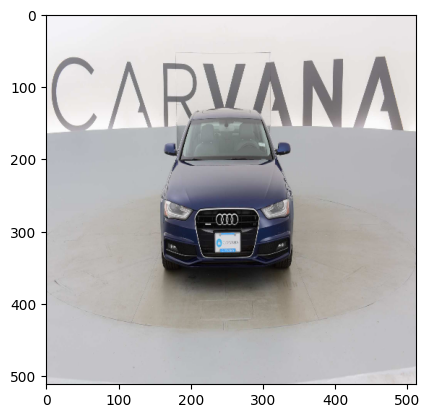

In [ ]:
plt.imshow(imgs[0].permute(1,2,0))
plt.show()

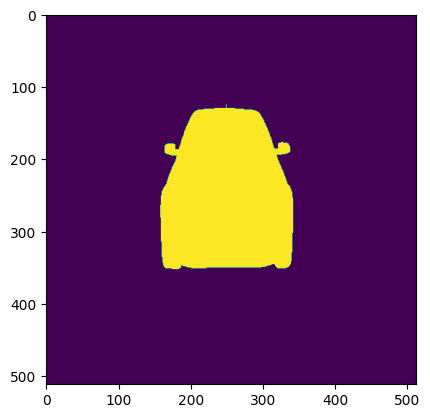

In [ ]:
# avoid visualing in PIL?
smnts *= 255
smnts = torch.where(smnts == 255, 0, smnts)
plt.imshow(smnts[0].numpy().squeeze(0))
plt.show()